# Memisahkan Data Menjadi Train Data dan Test Data
link = https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

## Penjelasan masing-masing kolom:
- no_of_dependants = jumlah tanggungan finansial yang dimiliki oleh pemohon pinjaman

## Import Library yang Dibutuhkan

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

## Membaca File CSV

In [15]:
df = pd.read_csv('loan_approval_dataset.csv')

# Menghapus extra spaces
# df = df.applymap(lambda x: x.strip())
df = df.rename(columns=lambda x: x.strip())
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Menghapus Kolom Index (loan_id)

In [3]:
# Menghapus kolom primary key
boolean_columns = [
    'self_employed'
]
# Mengubah nilai YES NO menjadi True False
for col in boolean_columns:
    df = df.replace({col: {'Yes': True, 'No': False}})

df.drop('loan_id', inplace = True, axis = 1)

## Memilih features dan class (loan_status)

In [4]:
X = df.drop(['loan_status'], axis = 1)
y = df['loan_status']

In [5]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Mengecek Jumlah data masing-masing object/value

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [7]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
  

## Memisahkan Data Training dan Data Testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=345)
train_data = pd.concat([X_train, y_train], axis=1).reset_index().drop('index', axis=1)
test_data = pd.concat([X_test, y_test], axis=1).reset_index().drop('index', axis=1)
X_test = X_test.reset_index().drop('index', axis=1)
display_side_by_side(train_data.head(), test_data.head(), X_test.head(), titles=["Data Train", "Data Test Dengan Target", "Data Test Tanpa Target"])

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,Not Graduate,Yes,1000000,3200000,2,710,100000,200000,3300000,900000,Approved
1,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
2,2,Not Graduate,No,7800000,17100000,14,351,19000000,7200000,19300000,7100000,Rejected
3,3,Graduate,Yes,5100000,20400000,6,754,1700000,2600000,11800000,7600000,Approved
4,3,Not Graduate,No,5200000,17300000,10,401,2600000,1400000,12700000,6400000,Rejected
,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,5,Graduate,Yes,6100000,22500000,6,776,17600000,9900000,13800000,4800000,Approved
1,0,Not Graduate,No,4100000,8800000,18,300,10900000,6400000,8600000,3500000,Rejected
2,2,Graduate,No,1800000,3800000,4,777,5100000,2700000,4600000,1400000,Approved
3,4,Not Graduate,Yes,8000000,23200000,14,738,10900000,12100000,19900000,5400000,Approved


## Data Frame Pandas ke CSV

### Membuat fungsi

In [9]:
import os

def to_csv(df, file_name: str):
    outdir = './loan_approval'
    if not os.path.exists(outdir):
        os.mkdir(outdir)
        
    fullname = os.path.join(outdir, file_name)    
    df.to_csv(fullname, index=False)

### Memanggul Fungsi

In [10]:
to_csv(train_data, 'train_data.csv')
to_csv(test_data, 'test_data.csv')
to_csv(X_test, 'test_data_without_label.csv')

C:\Users\itzbi\AppData\Local\Temp\ipykernel_18568\3551311630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop('loan_status', axis=1).copy().corr(), annot=True)


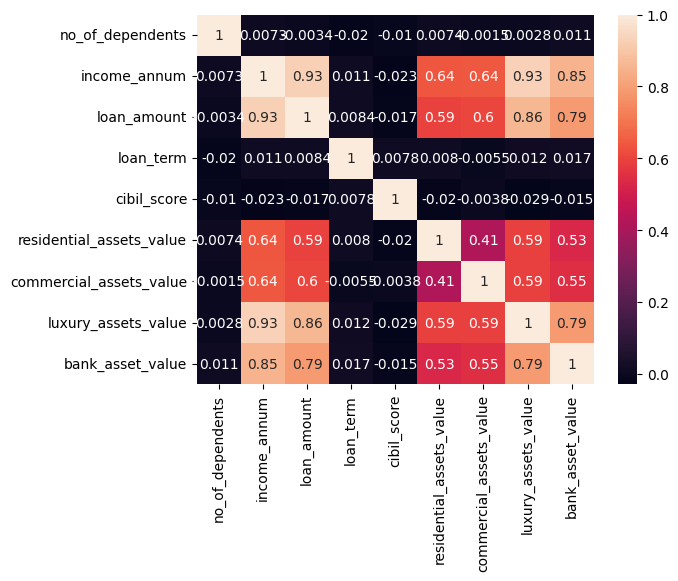

In [14]:
sns.heatmap(df.drop('loan_status', axis=1).copy().corr(), annot=True)
plt.show()